
## 데이터셋 출처
* https://dacon.io/competitions/open/235536/overview/description


### 데이터 구성

* title : 영화의 제목
* distributor : 배급사
* genre : 장르
* release_time : 개봉일
* time : 상영시간(분)
* screening_rat : 상영등급
* director : 감독이름
* dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
* dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)
* num_staff : 스텝수
* num_actor : 주연배우수
* box_off_num : 관객수



## 필요한 라이브러리 로드

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib
import warnings
warnings.filterwarnings("ignore")

In [2]:
train= pd.read_csv("data/movie/movies_train.csv")
print(train.shape)
train.head()

(600, 12)


,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [3]:
test= pd.read_csv("data/movie/movies_test.csv")
print(test.shape)
test.head()

(243, 11)


,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


<AxesSubplot: >

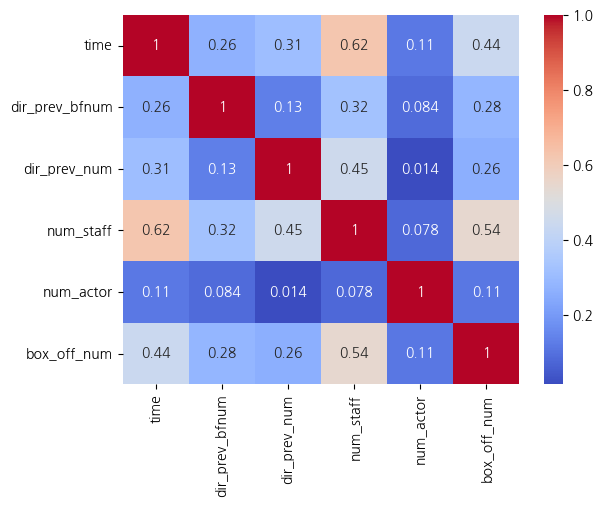

In [5]:
# 상관관계 확인하기
sns.heatmap(train.corr(), annot = True, cmap='coolwarm')

In [6]:
# 감독명, 영화제목 제거
train = train.drop(['title', 'director'],axis = 1)
test = test.drop(['title', 'director'],axis = 1)
display(train, test)

,distributor,genre,release_time,time,screening_rat,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,NaN,0,91,2,23398
1,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,1161602.50,2,387,3,7072501
2,(주)쇼박스,액션,2013-06-05,123,15세 관람가,220775.25,4,343,4,6959083
3,(주)NEW,코미디,2012-07-12,101,전체 관람가,23894.00,2,20,6,217866
4,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,1.00,1,251,2,483387
...,...,...,...,...,...,...,...,...,...,...
595,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,3833.00,1,510,7,1475091
596,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,496061.00,1,286,6,1716438
597,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,NaN,0,123,4,2475
598,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,NaN,0,431,4,2192525


,distributor,genre,release_time,time,screening_rat,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,3.005290e+05,2,304,3
1,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,3.427002e+05,4,275,3
2,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,4.206611e+06,3,419,7
3,(주)쇼박스,액션,2010-02-04,116,15세 관람가,6.913420e+05,2,408,2
4,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,3.173800e+04,1,380,1
...,...,...,...,...,...,...,...,...,...
238,디씨드,드라마,2015-11-19,78,15세 관람가,2.590000e+03,1,4,4
239,인디스토리,다큐멘터리,2015-10-29,86,12세 관람가,NaN,0,18,2
240,(주)컨텐츠온미디어,느와르,2015-10-28,107,청소년 관람불가,NaN,0,224,4
241,(주)씨타마운틴픽쳐스,드라마,2015-10-22,102,청소년 관람불가,5.069900e+04,1,68,7


In [7]:
# 상위 5개 배급사 제외 '기타'로 처리
distributor_list = train.distributor.value_counts()[:5]
def func(distributor):
    if distributor in distributor_list:
        return distributor
    else:
        return '기타'

train['distributor'] = train['distributor'].apply(lambda x : func(x))
test['distributor'] = test['distributor'].apply(lambda x : func(x))

display(train['distributor'], test['distributor'])

0       롯데엔터테인먼트
1         (주)쇼박스
2         (주)쇼박스
3         (주)NEW
4             기타
         ...    
595       (주)NEW
596       (주)쇼박스
597    (주)마운틴픽쳐스
598    CJ 엔터테인먼트
599    CJ 엔터테인먼트
Name: distributor, Length: 600, dtype: object

0             기타
1         (주)쇼박스
2      CJ 엔터테인먼트
3         (주)쇼박스
4      CJ 엔터테인먼트
         ...    
238           기타
239           기타
240           기타
241           기타
242           기타
Name: distributor, Length: 243, dtype: object

In [21]:
# 파생변수 만들기
train['년'] = train['release_time'].apply(lambda x: int(x[:4]))
train['월'] = train['release_time'].apply(lambda x: int(x[5:7]))
train =  train.drop(['release_time'],axis = 1)

test['년'] = test['release_time'].apply(lambda x: int(x[:4]))
test['월'] = test['release_time'].apply(lambda x: int(x[5:7]))
test =  test.drop(['release_time'],axis = 1)

display(train, test)

,distributor,genre,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,genre_rank,distributor_rank,screening_rat_12세 관람가,screening_rat_15세 관람가,screening_rat_전체 관람가,screening_rat_청소년 관람불가,년,월
0,롯데엔터테인먼트,액션,96,0.00,0,91,2,23398,2,4,0,0,0,1,2012,11
1,(주)쇼박스,느와르,130,1161602.50,2,387,3,7072501,1,1,0,0,0,1,2015,11
2,(주)쇼박스,액션,123,220775.25,4,343,4,6959083,2,1,0,1,0,0,2013,6
3,(주)NEW,코미디,101,23894.00,2,20,6,217866,3,3,0,0,1,0,2012,7
4,기타,코미디,108,1.00,1,251,2,483387,3,5,0,1,0,0,2010,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,(주)NEW,드라마,111,3833.00,1,510,7,1475091,8,3,0,0,0,1,2014,8
596,(주)쇼박스,드라마,127,496061.00,1,286,6,1716438,8,1,0,1,0,0,2013,3
597,(주)마운틴픽쳐스,공포,99,0.00,0,123,4,2475,4,6,0,0,0,1,2010,9
598,CJ 엔터테인먼트,느와르,102,0.00,0,431,4,2192525,1,2,0,1,0,0,2015,5


,distributor,genre,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,genre_rank,distributor_rank,screening_rat_12세 관람가,screening_rat_15세 관람가,screening_rat_전체 관람가,screening_rat_청소년 관람불가,년,월
0,기타,느와르,125,300529.00,2,304,3,1,5,0,0,0,1,2010,1
1,(주)쇼박스,멜로/로맨스,113,342700.25,4,275,3,10,1,1,0,0,0,2010,1
2,CJ 엔터테인먼트,드라마,115,4206610.67,3,419,7,8,2,1,0,0,0,2010,1
3,(주)쇼박스,액션,116,691342.00,2,408,2,2,1,0,1,0,0,2010,2
4,CJ 엔터테인먼트,공포,110,31738.00,1,380,1,4,2,0,1,0,0,2010,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,기타,드라마,78,2590.00,1,4,4,8,5,0,1,0,0,2015,11
239,기타,다큐멘터리,86,0.00,0,18,2,12,5,1,0,0,0,2015,10
240,기타,느와르,107,0.00,0,224,4,1,5,0,0,0,1,2015,10
241,기타,드라마,102,50699.00,1,68,7,8,5,0,0,0,1,2015,10


In [8]:
# 소수점 둘째자리까지 출력
pd.options.display.float_format = '{:.2f}'.format

In [9]:
train.groupby('genre')['box_off_num'].median().sort_values(ascending=False)

genre
느와르      1646142.00
액션       1147846.50
코미디       210775.00
공포        179810.00
서스펜스       82611.00
애니메이션      23802.00
SF          9323.00
드라마         7173.00
뮤지컬         4778.00
멜로/로맨스      3653.00
미스터리        3199.00
다큐멘터리       3044.00
Name: box_off_num, dtype: float64

In [10]:
# 장르 중앙값 기준으로 순위 설정
train['genre_rank'] = train.genre.map({'느와르' : 1, '액션' : 2, '코미디' : 3, '공포' : 4, '서스펜스' : 5, '애니메이션' : 6, 
                 'SF' : 7, '드라마' : 8, '뮤지컬' : 9, '멜로/로맨스' : 10, '미스터리': 11, '다큐멘터리' : 12})
test['genre_rank'] = test.genre.map({'느와르' : 1, '액션' : 2, '코미디' : 3, '공포' : 4, '서스펜스' : 5, '애니메이션' : 6, 
                 'SF' : 7, '드라마' : 8, '뮤지컬' : 9, '멜로/로맨스' : 10, '미스터리': 11, '다큐멘터리' : 12})

In [11]:
# 배급사 중앙값 기준으로 순위 설정
train['distributor_rank'] = train.distributor.map({'(주)쇼박스' : 1, 'CJ 엔터테인먼트' : 2, '(주)NEW' : 3, '롯데엔터테인먼트' : 4, '기타' : 5, '(주)마운틴픽쳐스' : 6})
test['distributor_rank'] = test.distributor.map({'(주)쇼박스' : 1, 'CJ 엔터테인먼트' : 2, '(주)NEW' : 3, '롯데엔터테인먼트' : 4, '기타' : 5, '(주)마운틴픽쳐스' : 6})

In [12]:
# 결측치 0으로 채우기
train['dir_prev_bfnum']= train['dir_prev_bfnum'].fillna(0)
test['dir_prev_bfnum']= test['dir_prev_bfnum'].fillna(0)
test.isna().sum()

distributor         0
genre               0
release_time        0
time                0
screening_rat       0
dir_prev_bfnum      0
dir_prev_num        0
num_staff           0
num_actor           0
genre_rank          0
distributor_rank    0
dtype: int64

In [13]:
train.select_dtypes(include="number").columns

Index(['time', 'dir_prev_bfnum', 'dir_prev_num', 'num_staff', 'num_actor',
       'box_off_num', 'genre_rank', 'distributor_rank'],
      dtype='object')

In [14]:
# 상영 등급 원핫 인코딩
train = pd.get_dummies(columns=['screening_rat'],data=train)
test = pd.get_dummies(columns=['screening_rat'],data=test)

In [15]:
# 머신러닝 알고리즘
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=3000, random_state=42, n_jobs=-1, max_depth=10, max_features=0.9)
model

RandomForestRegressor(max_depth=10, max_features=0.9, n_estimators=3000,
                      n_jobs=-1, random_state=42)

In [16]:
label_name='box_off_num'
label_name

'box_off_num'

In [17]:
# 상관 계수가 적은 'num_actor' 제거
feature_names = ['time', 'dir_prev_bfnum', 'dir_prev_num', 'num_staff', 'genre_rank', 'distributor_rank','screening_rat_12세 관람가', 'screening_rat_15세 관람가',
       'screening_rat_전체 관람가', 'screening_rat_청소년 관람불가', '년', '월']
feature_names

['time',
 'dir_prev_bfnum',
 'dir_prev_num',
 'num_staff',
 'genre_rank',
 'distributor_rank',
 'screening_rat_12세 관람가',
 'screening_rat_15세 관람가',
 'screening_rat_전체 관람가',
 'screening_rat_청소년 관람불가',
 '년',
 '월']

In [22]:
X_train = train[feature_names]
y_train = train[label_name]
X_test = test[feature_names]

In [23]:
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, max_features=0.9, n_estimators=3000,
                      n_jobs=-1, random_state=42)

In [24]:
model.score(X_train, y_train)

0.908564169551458

In [25]:
y_predict = model.predict(X_test)
y_predict[:5]

array([2955435.40452769, 1506755.01396507, 1869365.41998996,
       2001379.12481915, 1056849.27008379])

<AxesSubplot: >

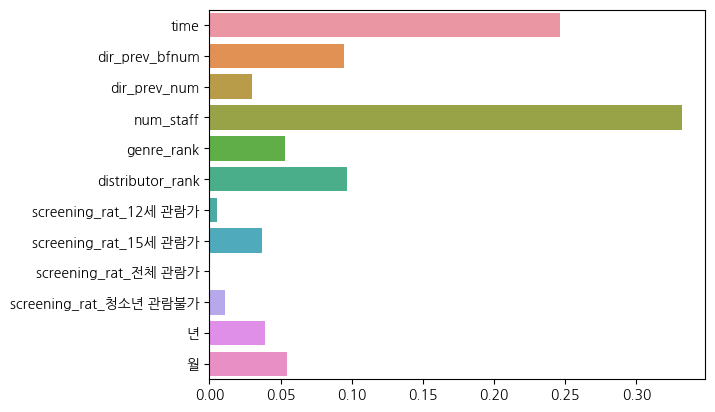

In [26]:
# 중요도 확인하기
sns.barplot(x=model.feature_importances_, y=model.feature_names_in_)


In [28]:
submit = pd.read_csv("data/movie/submission.csv")
submit.head(2)

,title,box_off_num
0,용서는 없다,0
1,아빠가 여자를 좋아해,0


In [29]:
submit["box_off_num"] = y_predict

In [31]:
submit.to_csv("data/movie/submit_12.csv", index=False)

In [33]:
pd.read_csv("data/movie/submit_12.csv").head()

,title,box_off_num
0,용서는 없다,2955435.40
1,아빠가 여자를 좋아해,1506755.01
2,하모니,1869365.42
3,의형제,2001379.12
4,평행 이론,1056849.27
